<a href="https://colab.research.google.com/github/sskboonmee/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [31]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [32]:
Name = 'ศศิกานต์ บุญมี'
ID = '6230205399'

In [33]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [34]:
Data = DataGenerator(Name,ID)

020:30:14


In [35]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,5.779841,9.590162,7.580040,-4.278572,-6.772580,-3.337118,9.763874,2.163429,8.836751,-9.402668,6.069058,-9.942346,-9.473521,-8.133425,-3.969872,-0.409420,7.109384,7.607849,1.669154,7.170246,-8.165292,4.877405,-7.617871,-6.756496,8.850628,-5.386895,7.550170,1.864166,4.126644,2.942146,19.180325,16.710729
1,-1.969309,-5.779929,-0.479035,7.120809,-6.967939,-2.562261,-1.431636,-2.876955,-8.809777,-7.156166,9.225777,-5.276836,-10.170002,-0.050986,2.987005,-1.758751,9.133687,-4.224050,6.810339,0.860089,4.585015,2.999504,-7.098761,-8.103267,8.184693,9.626054,3.503491,-0.090879,-0.446152,7.465699,-11.559858,39.328496
2,3.599102,3.524340,-6.054480,-9.089953,5.181669,-0.834194,-3.931799,-0.137943,-4.589369,-2.365034,3.685007,0.919187,-3.120397,-2.182186,-4.271154,2.253673,-6.701235,3.455984,7.511894,-4.712591,5.952467,-0.483959,3.421101,5.602329,7.429803,0.191208,2.966675,2.952572,-2.706058,2.749403,7.048680,15.747013
3,2.610732,2.268904,-4.365511,-8.991586,6.929414,0.396067,-3.116764,0.122945,-4.237205,-4.860459,1.596553,1.567507,-2.599508,-1.812618,-5.665761,4.284519,-6.163315,2.150961,6.780581,-7.338840,4.205672,-1.683074,4.436318,7.012761,4.945608,2.722019,1.213484,2.704299,-0.405857,0.589666,4.537807,4.948332
4,1.229763,6.218683,6.069170,7.837148,-7.564717,9.068409,8.398188,-6.073507,5.877496,-2.328447,-1.386795,2.800630,8.479073,6.045114,9.387522,3.651719,-8.845904,8.773557,-4.049647,4.501112,7.998507,-0.474366,6.817369,8.979003,11.270047,-5.587750,-4.801151,-4.927810,-0.572961,7.252844,12.437365,38.264218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4.115431,7.000837,-9.653089,-7.160725,9.323379,0.008322,8.853850,2.496611,3.815244,0.382697,6.690362,-3.427856,-4.262191,-1.233465,-2.097576,6.860297,-3.083898,-1.410190,-0.426802,-2.115237,2.321582,-6.152592,4.205598,-4.351731,9.674877,-8.252335,6.537963,-1.520673,-7.923699,3.938198,14.001675,21.690991
9996,8.642016,-10.310443,-4.164195,-0.103425,5.280763,10.100324,10.376776,2.035528,-2.865085,-3.634668,3.175611,3.091032,4.854759,-3.718518,9.154610,7.477065,-5.644479,3.183633,7.624630,-10.160440,-6.843769,9.264963,6.128426,4.705592,9.834965,-6.510483,-8.046730,5.285699,-0.492100,4.496800,-20.620886,24.484000
9997,2.576362,-2.282850,-1.977706,7.939707,1.760702,-6.222240,3.906714,-4.212861,7.771867,-2.179046,-7.370692,1.098961,-5.226815,-7.994809,-3.480564,1.547576,1.043375,7.676349,2.609321,-8.077446,6.056793,-7.367577,-8.567476,-3.069323,4.276709,-6.563668,-2.562896,10.299857,8.607741,1.419396,-4.565701,9.096982
9998,5.623216,6.132319,-9.526871,-7.102227,7.470630,1.645184,7.913972,-0.513498,6.165712,-2.734110,7.303640,-0.367817,-4.374165,-1.374892,-1.328014,6.636919,-2.271619,-4.250679,-0.379184,-3.499792,3.763622,-6.828777,4.275611,-3.615921,9.257696,-6.524113,6.213284,-3.265337,-6.691210,4.450119,12.264638,24.250595


#ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ

##Kmean
มี 3 ขั้นตอน คือ import Define Fit-tranform

####import

In [36]:
from sklearn.cluster import KMeans  

####Define

เป็นการกำหนดว่าKmeans มีตัวอะไรให้กำหนดบ้าง random state เป็นการกำหนดให้ได้ผลลัพธ์เหมือนกัน เนื่องจาก Kmeans เวลาสุ่มจะสุ่มจากเลขตัวไหนก็ได้ เราเลยต้อง fix ให้มันสุ่มจากเลขเดียวกัน ก็จะได้เหมือนๆกัน n_cluster คือการเซตค่า K

In [37]:
kmeans = KMeans(n_clusters=3, random_state=2021)  

####Fit-tranform

คำนวณจุด Cluster center ของข้อมูล Data ด้วยวิธี K-means clustering

In [38]:
kmeans.fit(Data)  #fit คือเอามาคำนวณว่าจุด Cluster center จะเป็นจุดไหน

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดงจุด Cluster center ที่คำนวณออกมาได้

In [39]:
kmeans.cluster_centers_   #จุดcentroy ของกลุ่มทั้ง 3 กลุ่ม

array([[ 1.27868004e+00,  2.70365000e+00, -2.19201288e+00,
         1.52253147e+00,  1.33335715e+00, -1.64449892e+00,
         2.69286360e+00,  2.12449263e+00,  3.99378693e+00,
        -2.26694150e+00,  6.76165699e-01, -4.08361205e-01,
        -1.34832070e+00, -1.14303399e+00, -3.90911575e+00,
        -4.43701633e-01, -8.14545742e-02,  1.74558265e+00,
         1.48564733e+00, -1.84455389e+00,  1.06833959e+00,
        -9.77326789e-01, -4.57707690e-01, -2.24550198e+00,
         3.93807181e+00, -3.02895878e+00,  5.53800147e-01,
         1.98129143e+00,  1.33574063e+00,  2.37214026e+00,
         5.40730000e+00,  1.38607013e+01],
       [ 2.36833390e+00, -3.55685420e+00, -3.03659164e-01,
         4.41739366e+00, -1.66876977e+00,  6.09908118e+00,
         4.70211125e+00, -1.93109228e+00, -2.95890055e+00,
        -2.13770101e+00,  2.53919180e+00, -4.87153224e-01,
         1.47141565e+00,  2.80878036e+00,  5.94916152e+00,
         1.84589372e+00, -3.06750741e-01,  3.08389661e+00,
         5.09

ทดสอบการจัดกลุ่มของ Data 

In [40]:
y = kmeans.predict(Data)   #สิ่งที่เราได้คือ ตัวนี้ซึ่งบอกว่าจุดไหนอยู่กลุ่มไหน
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int32)

#### PCA

In [41]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(Data)

In [45]:
from matplotlib import pyplot as plt

In [47]:
import matplotlib

In [54]:
matplotlib.rcParams['figure.figsize']=[15,20]

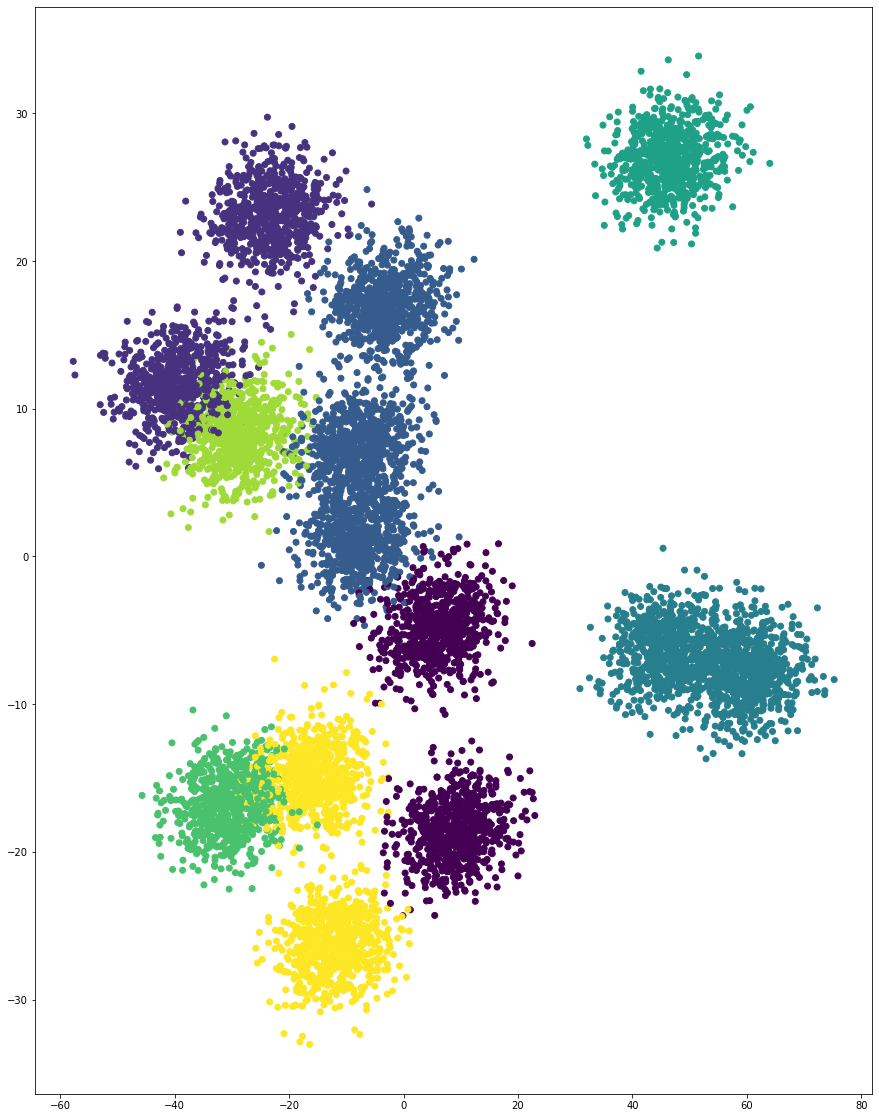

In [55]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

####หาค่า K ด้วยวิธีของ Elbow Method 



In [57]:
kmeans.inertia_    #ก็คือค่า SE-> Sum Square Error ที่คำนวณมาให้แล้ว

4633939.742169999

In [59]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [60]:
SSE

[19492074.617149524,
 12287226.791411135,
 10192922.646103252,
 8882237.446246957,
 7776083.319813388,
 6741366.527387712,
 5648010.760576062,
 4633939.742169999]

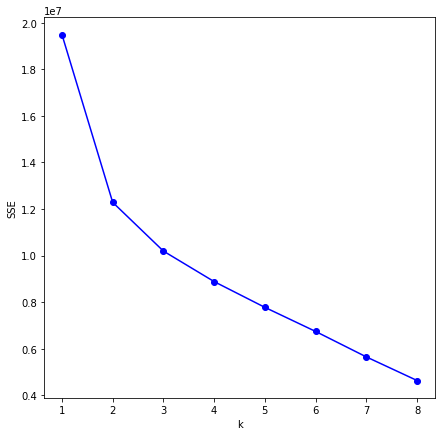

In [68]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')                 
matplotlib.rcParams['figure.figsize']=[7,7]
plt.xlabel('k')
plt.ylabel('SSE');

k = 3 กลุ่ม เนื่องจากข้อศอกอยู่ตรงที่ k=3

####หา k ด้วยวิธี Silhouette coefficient

In [69]:
from sklearn import metrics

In [70]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

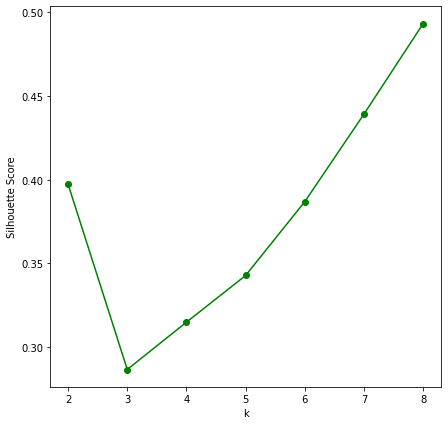

In [71]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

จุดที่มี Silhouette score สูงสุด จะดีที่สุด จากกราฟ  k=8 จะมี Silhouette score=0.48   แปลว่ามีความใกล้กันของ Dataในกลุ่มเดียวกันมาก และความห่างกันของ Data แต่ละกลุ่มมาก



In [78]:
matplotlib.rcParams['figure.figsize']=[15,20]

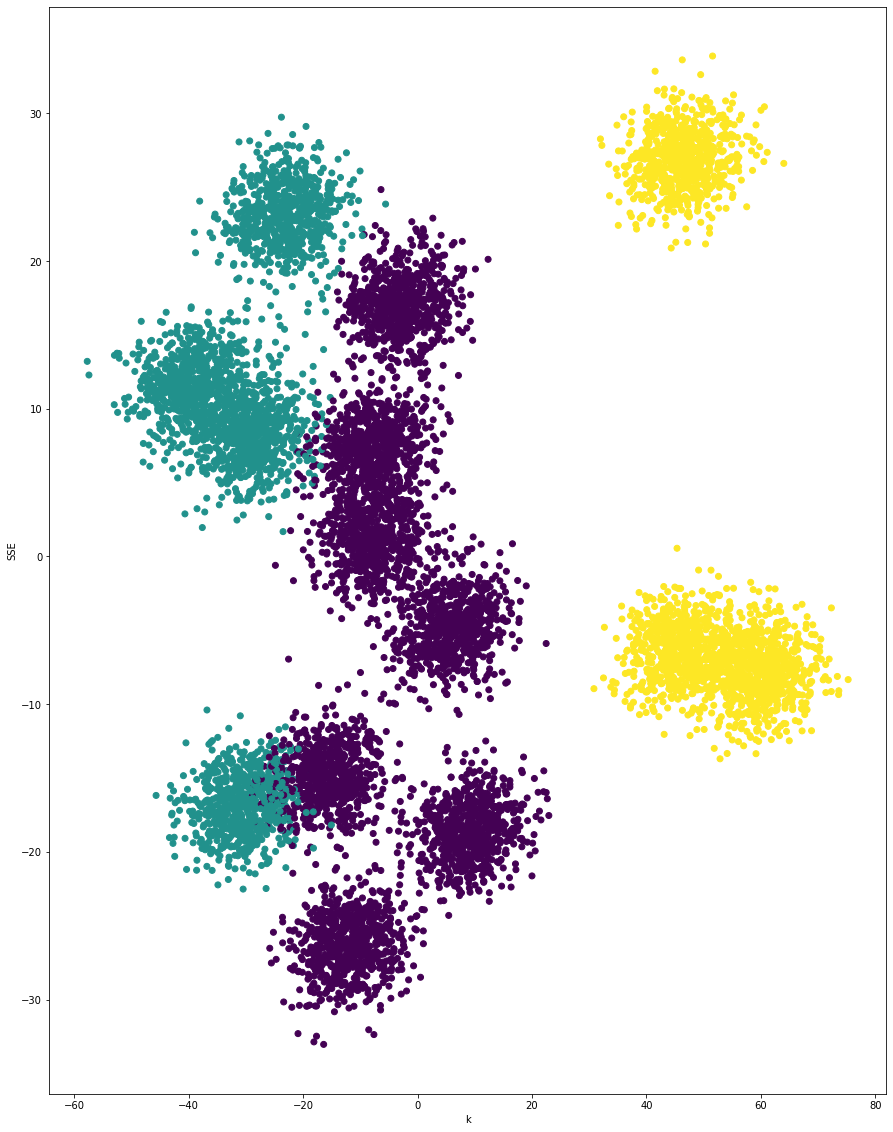

In [83]:
kmeans = KMeans(n_clusters = 3 ,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
plt.xlabel('k')
plt.ylabel('SSE');

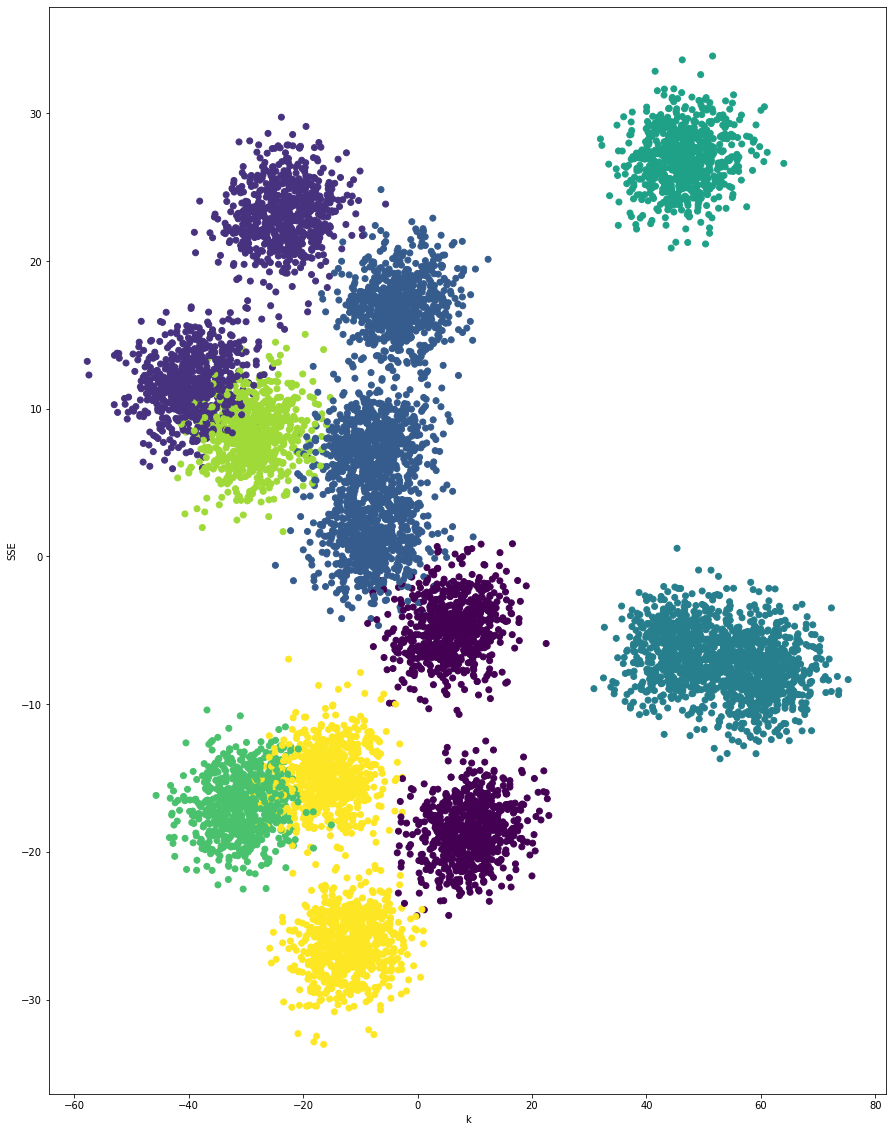

In [84]:
kmeans = KMeans(n_clusters = 8 ,random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
plt.xlabel('k')
plt.ylabel('SSE');

#ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

####MDS

In [85]:
from sklearn.manifold import MDS

In [86]:
mds = MDS(n_components=2)

In [ ]:
new_mds = mds.fit_transform(Data)

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.7)
plt.xlabel('X') 
plt.ylabel('Y');